In [1]:
!pip install nlp
!pip install WordCloud
!pip install pyspellchecker
!pip install textblob

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sklearn.decomposition as skd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
# Plotting
import matplotlib.pyplot as plt 
import seaborn as sns
import operator
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sklearn.model_selection
import sklearn.linear_model
from scipy.stats import t
# Tensorflow
import tensorflow as tf
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nlp
import random
# Natural Language tool kit 
import nltk
from nltk.corpus import stopwords
import re
import unicodedata
nltk.download('wordnet')
# Word cloud
from wordcloud import WordCloud
# Spell Checker
from spellchecker import SpellChecker
# Counter
from collections import Counter
from spellchecker import SpellChecker
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data Clean Up and Split

In [3]:
# Train and Test data is read in
test_data = pd.read_csv('Corona_NLP_test.csv')
train_data = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')
# Initialize tweet and label data as df's
tweetData = train_data['OriginalTweet']
labelData = train_data['Sentiment']
labelList = labelData.tolist()

### Exploratory Data Analysis


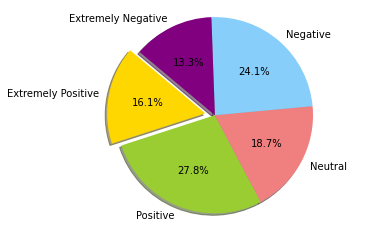

In [4]:
epCount, pCount, nCount, nnCount, enCount = 0, 0, 0, 0, 0

# Setiment frequence analysis 
for tweet in train_data['Sentiment']:
  if tweet == "Extremely Positive":
    epCount += 1
  if tweet == "Positive":
    pCount += 1
  if tweet == "Neutral":
    nCount += 1
  if tweet == "Negative":
    nnCount += 1
  if tweet == "Extremely Negative":
    enCount += 1
labels = 'Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative'
sizes = [epCount, pCount, nCount, nnCount, enCount]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Tweet Clean Up

###Punctuation Removal

###Stopword Removal

###Spelling Correction

In [5]:
nltk.download('stopwords')
#Function to load in tweets data and clean it based on our parameters. 
def message_cleaning(message):
    b = TextBlob(message)
    Test_punc_removed = [char for char in b if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word.lower() for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean
tweetData_clean = tweetData.apply(message_cleaning)
tweetsFinal = pd.DataFrame()
tweetList = []
for i in range(len(tweetData_clean)):
  tweet = ''
  for j in range(len(tweetData_clean[i])):
    word = tweetData_clean[i][j] + " "
    tweet += word
  tweetList.append(tweet)

# New dataframe is intialized with clean data
tweetsFinal['tweets'] = tweetList
tweetsFinal['labels'] = labelList
tweetsFinal

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweets,labels
0,menyrbie philgahan chrisitv httpstcoifz9fan2pa...,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia woolworths give elderly ...,Positive
3,food stock one empty please dont panic enough ...,Positive
4,ready go supermarket covid19 outbreak im paran...,Extremely Negative
...,...,...
41152,airline pilots offering stock supermarket shel...,Neutral
41153,response complaint provided citing covid19 rel...,Extremely Negative
41154,know itâs getting tough kameronwilds rationin...,Positive
41155,wrong smell hand sanitizer starting turn coron...,Neutral


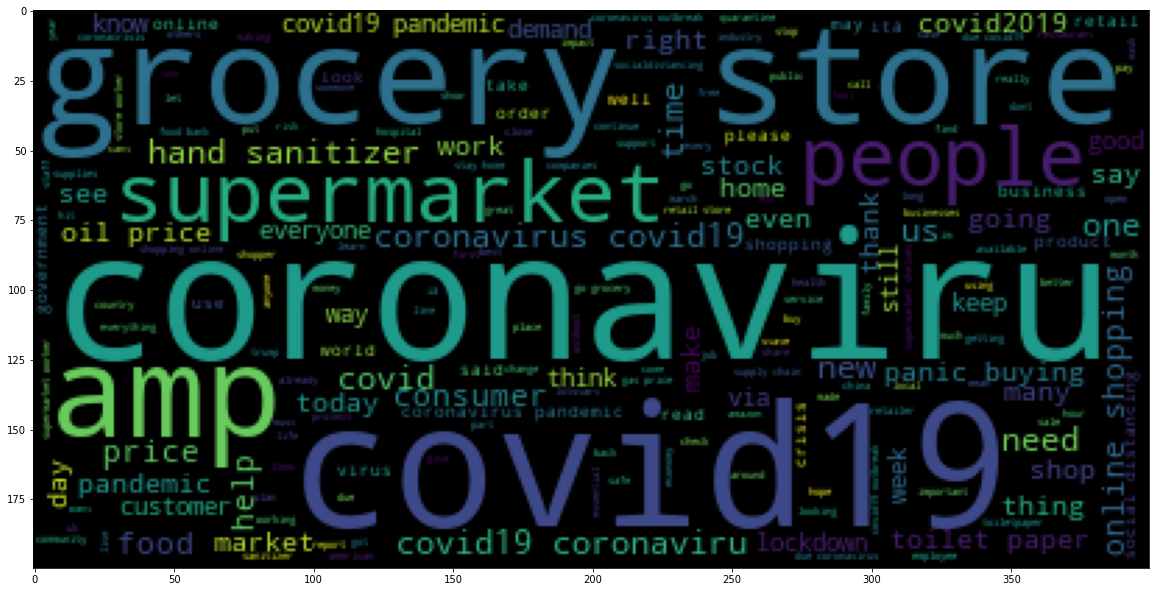

In [6]:
#Tweet List is loaded into a single sentence and displayed as a Word Cloud
sentences = tweetList
sentencesJoined = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentencesJoined))

# Text Distribution of Most Popular Words

          Word  Frequency
0  coronavirus      17958
1      covid19      16795
2       prices       7882
3         food       7032
4  supermarket       6981
5        store       6776
6      grocery       6232
7       people       5467
8          amp       4955
9     consumer       4455


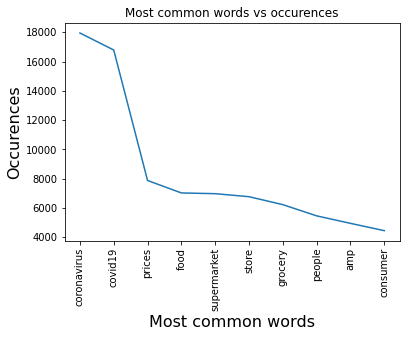

In [7]:
# A word frequency counter is ran over the tweet list
p = Counter(" ".join(tweetsFinal['tweets']).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)
# Results are plotted in a line graph
plt.plot(rslt['Word'],rslt['Frequency'])
plt.rc('xtick', labelsize=7)
plt.xticks(rotation=90)
plt.title("Most common words vs occurences")
plt.xlabel('Most common words', fontsize=16)
plt.ylabel('Occurences', fontsize=16)
plt.show()

# Keyword Combination

Dataframe Initializing

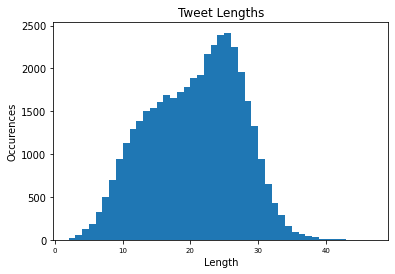

In [8]:
y = tweetsFinal['labels']

# Split it X_train/test, Y_train/test
X_train, X_test, y_train, y_test = train_test_split(tweetsFinal, y, test_size=0.2, random_state=1)

# Split it X_train/val, Y_train/val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


# Initiliaze a tokenize for top 10000 words
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>') #out of vocab token, if not in top 1000 = <UNK>
tokenizer.fit_on_texts(tweetList)

#Plot Average Length of tweets (Length vs total)
lengths = [len(t.split(' ')) for t in tweetList]
plt.hist(lengths,bins = len(set(lengths)))
plt.xlabel("Length")
plt.ylabel("Occurences")
plt.title("Tweet Lengths")
plt.show()

In [9]:
maxlen = 30

#Tokenize sequence and padd up to 30 with zeros
def getSequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  sequencesP = pad_sequences(sequences , truncating='post', padding= 'post', maxlen=maxlen) #post = at end of sequence
  return sequencesP

pad_train_seq = getSequences(tokenizer, tweetList)

# Create Classes index and convert to int
classes = set(labelList)
print(classes)


{'Positive', 'Extremely Negative', 'Neutral', 'Extremely Positive', 'Negative'}


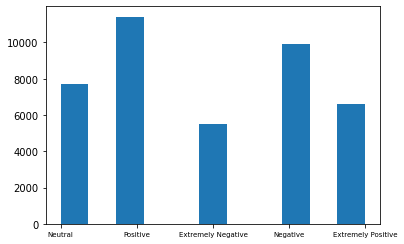

In [10]:
# Contruct an index --> class function
class_to_index = dict((c,i) for i,c in enumerate(classes))
# Contruct an class --> index function
index_to_class = dict((v,k) for k,v in class_to_index.items())

names_to_id = lambda labelList: np.array([class_to_index.get(x) for x in labelList])

train_labels = names_to_id(labelList)
train_labels
#Plot the frequency distribution of sentiments. 
plt.hist(labelList, bins=11)
plt.show()

#  N-GRAM ANALYSIS

In [11]:
# 5df split the finalTweets into each label

# Extremely Negative
tweetsENeg = tweetsFinal[tweetsFinal.labels == 'Extremely Negative']
tweetsENeg = tweetsENeg.reset_index()
tweetsENeg = tweetsENeg.drop(columns=['index'])

# Negative
tweetsNeg = tweetsFinal[tweetsFinal.labels == 'Negative']
tweetsNeg = tweetsNeg.reset_index()
tweetsNeg = tweetsNeg.drop(columns=['index'])

# Neutral
tweetsN = tweetsFinal[tweetsFinal.labels == 'Neutral']
tweetsN = tweetsN.reset_index()
tweetsN = tweetsN.drop(columns=['index'])

# Positive
tweetsP = tweetsFinal[tweetsFinal.labels == 'Positive']
tweetsP = tweetsP.reset_index()
tweetsP = tweetsP.drop(columns=['index'])

# Extremely Positive
tweetsEP = tweetsFinal[tweetsFinal.labels == 'Extremely Positive']
tweetsEP = tweetsEP.reset_index()
tweetsEP = tweetsEP.drop(columns=['index'])

#Initialize cleaning function for n-gram anlaysis
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') 
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

#Clean the df's for each sentiment
ENegwords = basic_clean(''.join(str(tweetsENeg['tweets'].tolist())))
Negwords = basic_clean(''.join(str(tweetsNeg['tweets'].tolist())))
Nwords = basic_clean(''.join(str(tweetsN['tweets'].tolist())))
Pwords = basic_clean(''.join(str(tweetsP['tweets'].tolist())))
EPwords = basic_clean(''.join(str(tweetsEP['tweets'].tolist())))

In [12]:
# Initialize and plot bigram analysis of sentiments
bigrams_seriesENeg = (pd.Series(nltk.ngrams(ENegwords, 2)).value_counts())[:12]
bigrams_seriesNeg = (pd.Series(nltk.ngrams(Negwords, 2)).value_counts())[:12]
bigrams_seriesN = (pd.Series(nltk.ngrams(Nwords, 2)).value_counts())[:12]
bigrams_seriesP = (pd.Series(nltk.ngrams(Pwords, 2)).value_counts())[:12]
bigrams_seriesEP = (pd.Series(nltk.ngrams(EPwords, 2)).value_counts())[:12]

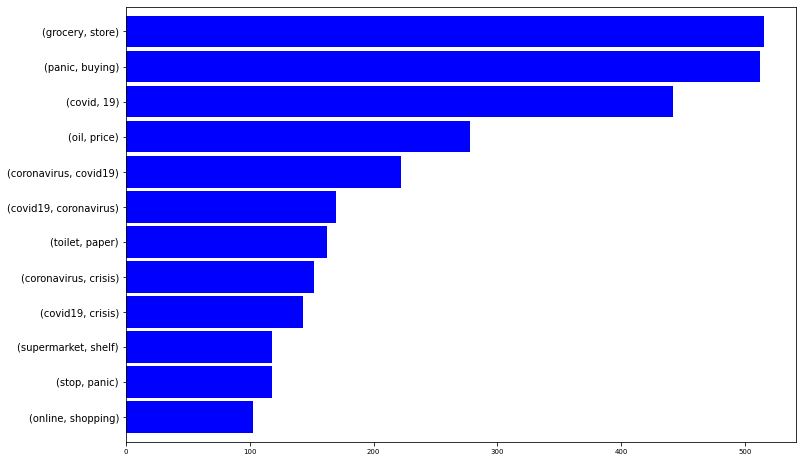

In [13]:
bigrams_seriesENeg.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8),stacked = True)

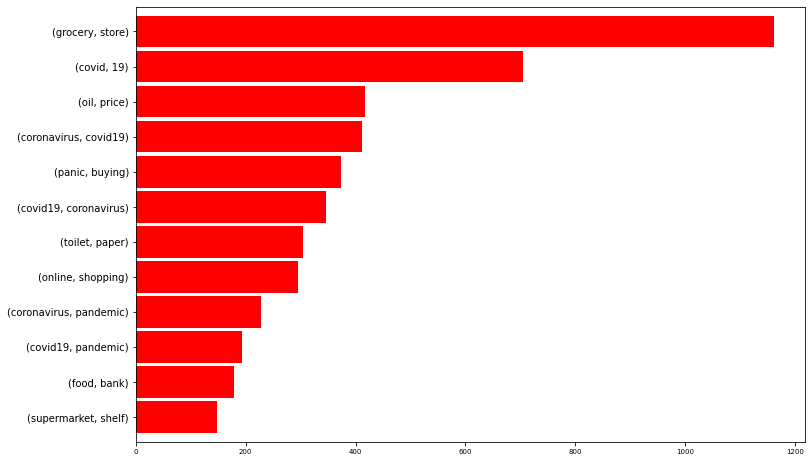

In [14]:
bigrams_seriesNeg.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8),stacked = True)

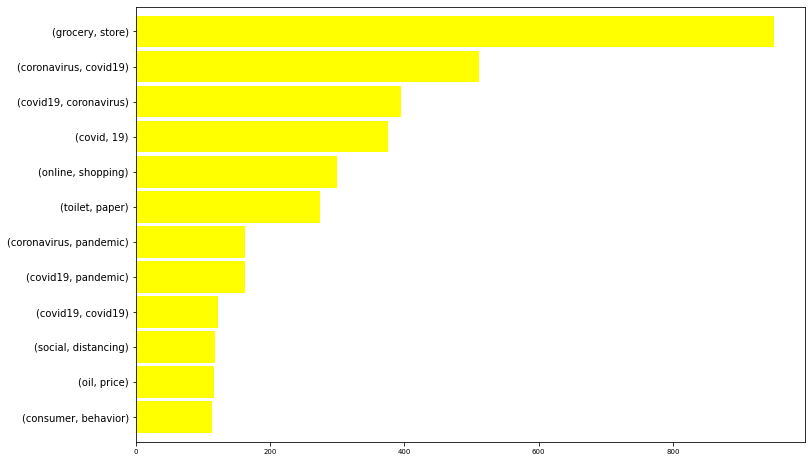

In [15]:
bigrams_seriesN.sort_values().plot.barh(color='yellow', width=.9, figsize=(12, 8),stacked = True)

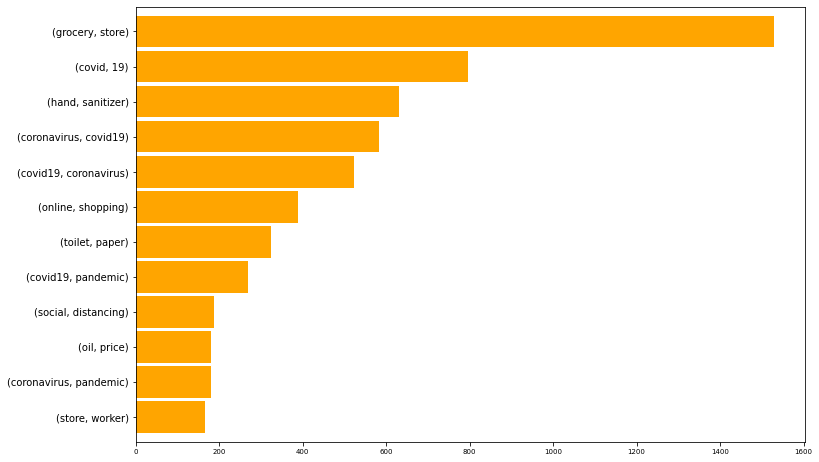

In [16]:
bigrams_seriesP.sort_values().plot.barh(color='orange', width=.9, figsize=(12, 8),stacked = True)

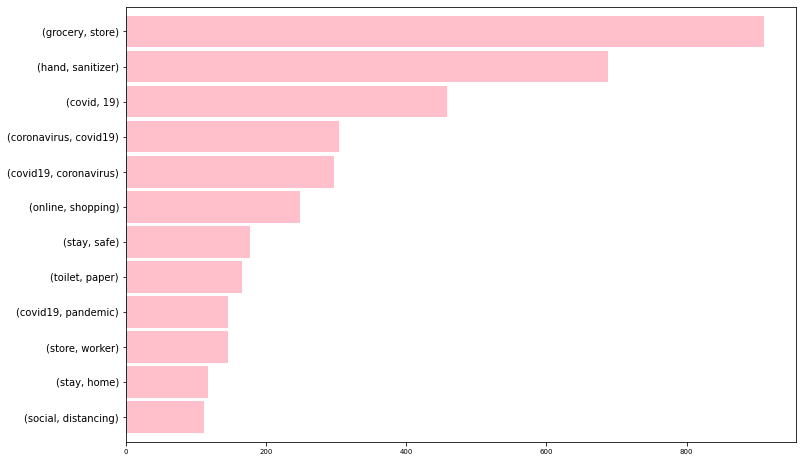

In [17]:
bigrams_seriesEP.sort_values().plot.barh(color='pink', width=.9, figsize=(12, 8),stacked = True)

In [18]:
# Initialize and plot Onegram analysis of sentiments
Onegrams_seriesENeg = (pd.Series(nltk.ngrams(ENegwords, 1)).value_counts())[:12]
Onegrams_seriesNeg = (pd.Series(nltk.ngrams(Negwords, 1)).value_counts())[:12]
Onegrams_seriesN = (pd.Series(nltk.ngrams(Nwords, 1)).value_counts())[:12]
Onegrams_seriesP = (pd.Series(nltk.ngrams(Pwords, 1)).value_counts())[:12]
Onegrams_seriesEP = (pd.Series(nltk.ngrams(EPwords, 1)).value_counts())[:12]

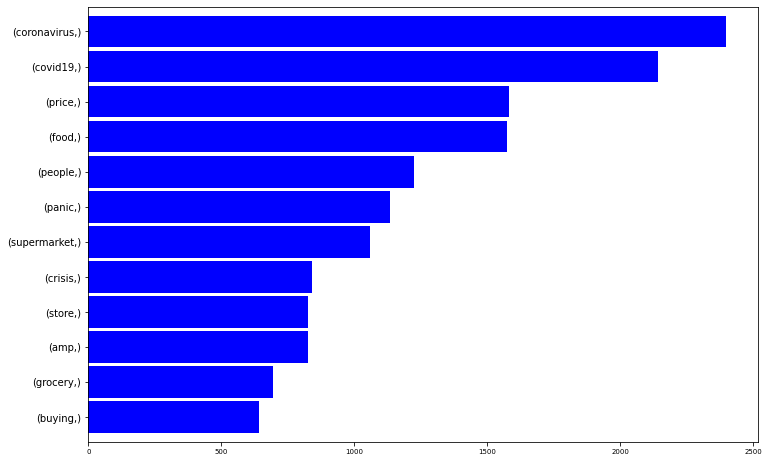

In [19]:
Onegrams_seriesENeg.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8),stacked = True)

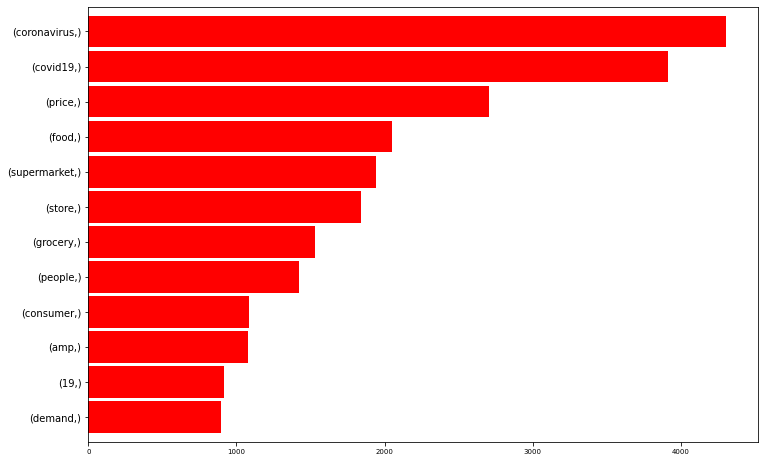

In [20]:
Onegrams_seriesNeg.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8),stacked = True)

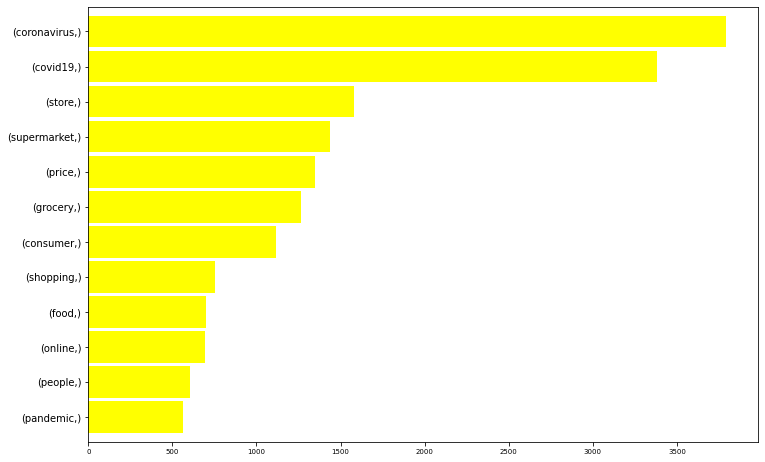

In [21]:
Onegrams_seriesN.sort_values().plot.barh(color='yellow', width=.9, figsize=(12, 8),stacked = True)

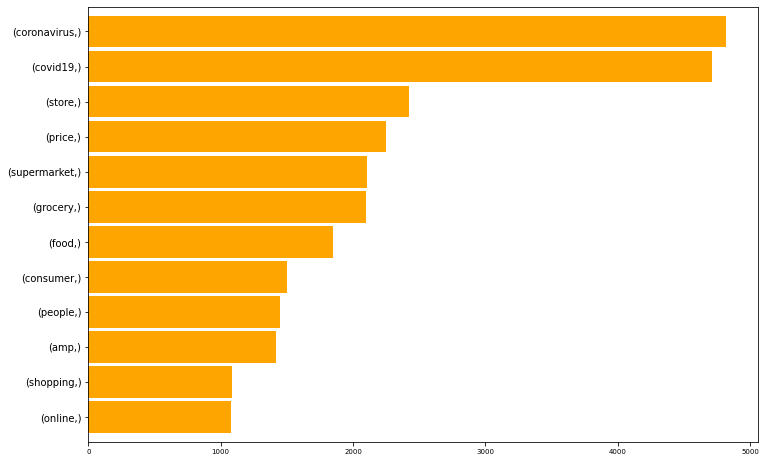

In [22]:
Onegrams_seriesP.sort_values().plot.barh(color='orange', width=.9, figsize=(12, 8),stacked = True)

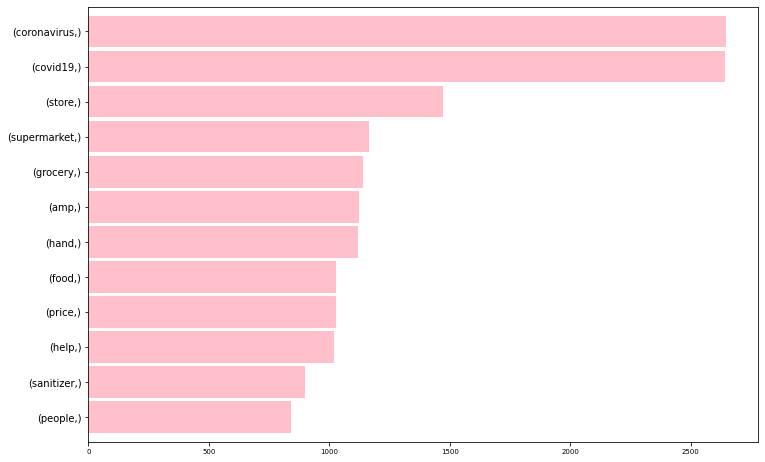

In [23]:
Onegrams_seriesEP.sort_values().plot.barh(color='pink', width=.9, figsize=(12, 8),stacked = True)

# Naive Bayes


In [24]:
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweetList)
print(tweets_countvectorizer.shape)

(41157, 86909)


In [25]:
#define pipelines with models for baselines/low computation predictions
#basic NB classifier
text_NB = Pipeline([
    ('clf', MultinomialNB()),
])

#NB with TFIDF
text_AllNB = Pipeline([
    ('clf', MultinomialNB()),
])

#Linear SVM with TFIDF
text_SGD = Pipeline([
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

#hyperparameter to vary. alpha was a significant hyperparamter to test
parameters = {
    'clf__alpha': (2,1e-0,1e-1,1e-2, 1e-3),
}

X = tweets_countvectorizer
y = tweetsFinal['labels']

(28809, 86909)
0.45472951085195984
clf__alpha: 0.1


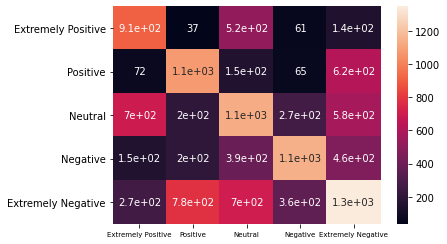

In [26]:
#training the first NB classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)

#cross validate the alpha smoothing value with 5-folds
gs_clf = GridSearchCV(text_NB, parameters, cv=5, n_jobs=-1)
#train the model
gs_clf = gs_clf.fit(X_train, y_train)

#make predicitons
y_predict_test = gs_clf.predict(X_test) #text_clf.predict(X_test)#NB_classifier.predict(X_test)
count = np.mean(y_predict_test == y_test)
print(count)

#print important results
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)


for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

In [27]:
#print important results
print(classification_report(y_test, y_predict_test))

                    precision    recall  f1-score   support

Extremely Negative       0.43      0.55      0.48      1671
Extremely Positive       0.47      0.54      0.50      1994
          Negative       0.39      0.39      0.39      2878
           Neutral       0.60      0.49      0.54      2344
          Positive       0.43      0.39      0.41      3461

          accuracy                           0.45     12348
         macro avg       0.46      0.47      0.46     12348
      weighted avg       0.46      0.45      0.45     12348



In [28]:
X = tweets_countvectorizer
y = tweetsFinal['labels']

#training the second NB classifier

#pass the tweets through a tfidf transformer for term frequency normalization
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X)
X_train_tfidf.shape

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=0.3)

#cross validate the alpha smoothing value with 5-folds
gs_clf = GridSearchCV(text_AllNB, parameters, cv=5, n_jobs=-1)
#train model
gs_clf = gs_clf.fit(X_train, y_train)

0.4343213475866537
[[ 426   22  878   31  311]
 [  13  602  165   40 1079]
 [ 191   90 1491  158 1145]
 [  58   93  528  735  913]
 [  68  378  648  176 2109]]
                    precision    recall  f1-score   support

Extremely Negative       0.56      0.26      0.35      1668
Extremely Positive       0.51      0.32      0.39      1899
          Negative       0.40      0.48      0.44      3075
           Neutral       0.64      0.32      0.42      2327
          Positive       0.38      0.62      0.47      3379

          accuracy                           0.43     12348
         macro avg       0.50      0.40      0.42     12348
      weighted avg       0.48      0.43      0.43     12348

clf__alpha: 0.1


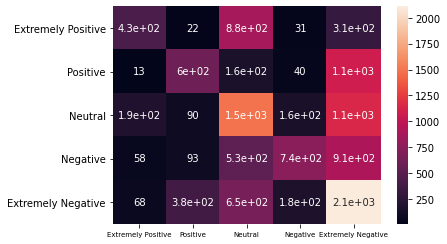

In [29]:
#predict and print relevant results

y_predict_test = gs_clf.predict(X_test) #text_clf.predict(X_test)#NB_classifier.predict(X_test)
count = np.mean(y_predict_test == y_test)
print(count)
cm = confusion_matrix(y_test, y_predict_test)
print(cm)
sns.heatmap(cm, annot=True,xticklabels=labels, yticklabels=labels)
print(classification_report(y_test, y_predict_test))

for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=0.3)

#training the linear SVM classifier

#crossvalidate and train
gs_clf = GridSearchCV(text_SGD, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

0.5289925494007127
                    precision    recall  f1-score   support

Extremely Negative       0.53      0.72      0.61      1655
Extremely Positive       0.50      0.78      0.61      1964
          Negative       0.53      0.32      0.40      2905
           Neutral       0.57      0.73      0.64      2374
          Positive       0.51      0.33      0.40      3450

          accuracy                           0.53     12348
         macro avg       0.53      0.58      0.53     12348
      weighted avg       0.53      0.53      0.51     12348

clf__alpha: 0.001


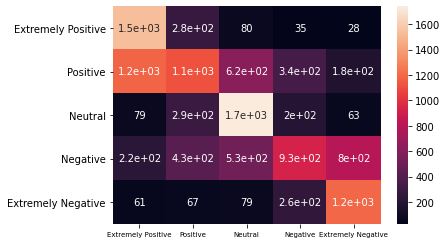

In [31]:
#predict and print relevant results
y_predict_test = gs_clf.predict(X_test) #text_clf.predict(X_test)#NB_classifier.predict(X_test)
count = np.mean(y_predict_test == y_test)
print(count)
cm = confusion_matrix(y_test, y_predict_test, labels=labels)
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)
print(classification_report(y_test, y_predict_test))

for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

# Tokenization and LSTM

In [32]:
# Initialize LSTM Model

model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, 16, input_length=30),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),                            
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the LSTM Model

model.compile(
    
    loss= 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 16)            160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 40)            5920      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                9760      
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 205       
Total params: 175,885
Trainable params: 175,885
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Initialize Val data and labels
valTweetData = X_val['tweets']
valLabelData = y_val
valTweets = valTweetData.tolist()
valLabels = valLabelData.tolist()
val_seq = getSequences(tokenizer, valTweets)
val_labels = names_to_id(valLabels)

# Fit the Model over 50 epochs with a patience of 3
LSTM = model.fit(
    pad_train_seq, train_labels,
    validation_data = (val_seq,val_labels),
    epochs=50,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
    ]
)

Epoch 1/50
1287/1287 [==============================] - 54s 37ms/step - loss: 1.3485 - accuracy: 0.4084 - val_loss: 0.7044 - val_accuracy: 0.7478
Epoch 2/50
1287/1287 [==============================] - 46s 36ms/step - loss: 0.7168 - accuracy: 0.7468 - val_loss: 0.5459 - val_accuracy: 0.8198
Epoch 3/50
1287/1287 [==============================] - 46s 36ms/step - loss: 0.5695 - accuracy: 0.8132 - val_loss: 0.4724 - val_accuracy: 0.8531
Epoch 4/50
1287/1287 [==============================] - 46s 36ms/step - loss: 0.5057 - accuracy: 0.8372 - val_loss: 0.4108 - val_accuracy: 0.8779
Epoch 5/50
1287/1287 [==============================] - 46s 36ms/step - loss: 0.4390 - accuracy: 0.8637 - val_loss: 0.3539 - val_accuracy: 0.8918
Epoch 6/50
1287/1287 [==============================] - 46s 36ms/step - loss: 0.3869 - accuracy: 0.8817 - val_loss: 0.3236 - val_accuracy: 0.9068
Epoch 7/50
1287/1287 [==============================] - 46s 36ms/step - loss: 0.3476 - accuracy: 0.8972 - val_loss: 0.2800 -

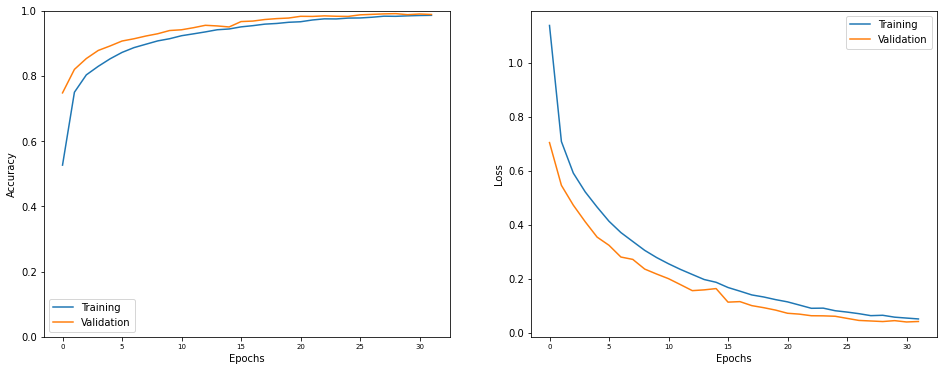

In [34]:
# Plot the epochs vs val accuracy and epochs vs loss
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(LSTM)

In [35]:
tweetData = test_data['OriginalTweet']
labelData = test_data['Sentiment']
labelList = labelData.tolist()

nltk.download('stopwords')
#Function to load in tweets data and clean it based on our parameters. 
def message_cleaning(message):
    b = TextBlob(message)
    Test_punc_removed = [char for char in b if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word.lower() for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean
tweetData_clean = tweetData.apply(message_cleaning)
tweetsFinal = pd.DataFrame()
tweetList = []
for i in range(len(tweetData_clean)):
  tweet = ''
  for j in range(len(tweetData_clean[i])):
    word = tweetData_clean[i][j] + " "
    tweet += word
  tweetList.append(tweet)

# New dataframe is intialized with clean data
tweetsFinal['tweets'] = tweetList
tweetsFinal['labels'] = labelList

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


test_tweets = tweetsFinal['tweets']
test_labels = tweetsFinal['labels']
test_seq = getSequences(tokenizer,test_tweets)
test_labels = names_to_id(test_labels)

_ = model.evaluate(test_seq, test_labels)

i = random.randint(0, len(test_labels) - 1)

print('Sentence:', test_tweets[i])
print('Emotion:', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i],  axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]
print('Predicted Emotion:', pred_class)

preds = model.predict_classes(test_seq)

119/119 [==============================] - 1s 7ms/step - loss: 2.2806 - accuracy: 0.6382
Sentence: coronavirus michigan people preparing stocking food supplies case store shelves several major retailers empty nearly empty tissues toilet paper sanitizer wipes httpstcok3atv7gojr 
Emotion: Negative
Predicted Emotion: Negative


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


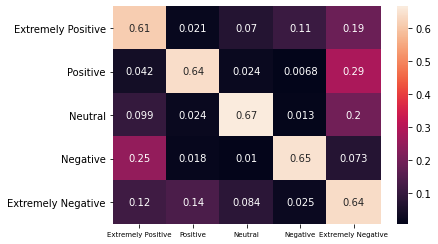

In [37]:
cm = confusion_matrix(test_labels, preds, normalize='true')
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)

In [39]:
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       947
           1       0.67      0.64      0.65       592
           2       0.70      0.67      0.68       619
           3       0.73      0.65      0.69       599
           4       0.56      0.64      0.60      1041

    accuracy                           0.64      3798
   macro avg       0.66      0.64      0.65      3798
weighted avg       0.64      0.64      0.64      3798

